In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [116]:
data = pd.read_excel('/content/data.xlsx')
data.head(5)

,X1,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [117]:
def feature_standard(data):
    data_Scaled = (data - np.mean(data, axis = 0)) / np.std(data, axis = 0)

    return data_Scaled

In [118]:
data.iloc[:, :-1] = feature_standard(data.iloc[:,:-1])
data.head()

,X1,X2,X3,X4,Y
0,-0.629519,-0.987297,1.820488,-0.009519,463.26
1,0.741909,0.681045,1.141863,-0.974621,444.37
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90


In [119]:
def split_data(df, train_percent):
  np.random.seed(3)
  perm = np.random.permutation(df.index)

  n = len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  X_train = train.iloc[:, :-1]
  Y_train = train.iloc[:, -1]

  X_test = test.iloc[:, :-1]
  Y_test = test.iloc[:, -1]

  return X_train, X_test, Y_train, Y_test

In [120]:
X_train, X_test, Y_train, Y_test = split_data(data,0.8)

In [121]:
class RMS:

  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None


  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = (np.sum((X.dot(self.theta) - y) ** 2) )/ 2
    return loss

    
  def fitRMS(self,X,y,decay_factor = 0.9,  eps=0.0000001):
    m = len(y)
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)

    
    E = [0 for _ in range(len(self.theta))]

    for i in range(self.epoch):
      # Update E and the model weights iteratively (Note: speed up could be gained from vectorized implementation)
      for idx, gradient in enumerate(X.T @ (X @ self.theta - y)):    
        E[idx] = decay_factor*E[idx] + (1 - decay_factor)*(gradient**2)
        self.theta[idx] = self.theta[idx] - (self.lr/np.sqrt(E[idx] + eps))*gradient

        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history

  def predict(self, X):
    X = self.add_ones(X.values)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')
    return 
    
  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc


In [122]:
rms = RMS(0.9,2000)

In [123]:
_,loss_history1 = rms.fitRMS(X_train,Y_train)

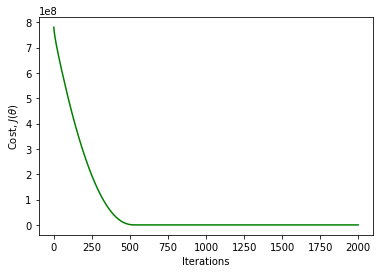

In [124]:
rms.Plot(loss_history1)

In [149]:
class Adam:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = float((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
  def fitAdam(self,X,y,b1 = 0.9, b2 = 0.999,  eps=0.0000001):
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)

    
    # Variable Initialization
    num_param = len(self.theta)
    m = [0 for _ in range(num_param)] 
    v = [0 for _ in range(num_param)] 
    g = [0 for _ in range(num_param)] 
    
    for t in range(1,self.epoch): 
      # Getting the partial derivatives
      g = (X.T @ (X @ self.theta - y))

      # Update the m and v parameter
      m = [b1*m_i + (1 - b1)*g_i for m_i, g_i in zip(m, g)]
      v = [b2*v_i + (1 - b2)*(g_i**2) for v_i, g_i in zip(v, g)]

      # Bias correction for m and v
      m_cor = [m_i / (1 - (b1**t)) for m_i in m]
      v_cor = [v_i / (1 - (b2**t)) for v_i in v]

      # Update the parameter
      self.theta = [theta - (self.lr / (np.sqrt(v_cor_i) + eps))*m_cor_i for theta, v_cor_i, m_cor_i in zip(self.theta, v_cor, m_cor)]
      
      self.cost_history[t] = self.compute_cost(X, y)

    return self.theta, self.cost_history


  

  def predict(self, X):
    X = self.add_ones(X.values)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')
    return 
  
  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc


In [150]:
adam = Adam(0.9,2000)

In [151]:
_,loss_history2 = adam.fitAdam(X_train,Y_train)

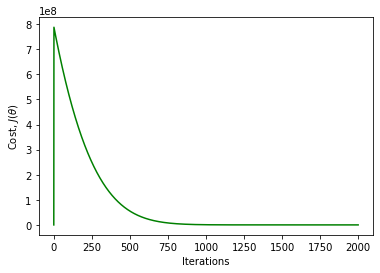

In [152]:
adam.Plot(loss_history2)

In [806]:
class Adagrad:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None
  

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = float((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
            
  def fitadagrad(self,X, y, eps=0.0000001):
    m = len(y)
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)
    

    num_param = len(self.theta)
    G = [[0 for _ in range(num_param)] for _ in range(num_param)]
    
    for i in range(self.epoch):
  
        for idx, gradient in enumerate((X.T @ (X @ self.theta - y))):
            G[idx][idx] = G[idx][idx] + gradient**2
            self.theta[idx] = self.theta[idx] - (self.lr / np.sqrt(G[idx][idx] + eps)) * gradient
      
        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history


  def predict(self, X,theta):
    X = self.add_ones(X.values)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel

  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc


In [807]:
adagrad = Adagrad(0.9,2000)

In [809]:
theta,loss_history3 = adagrad.fitadagrad(X_train,Y_train)

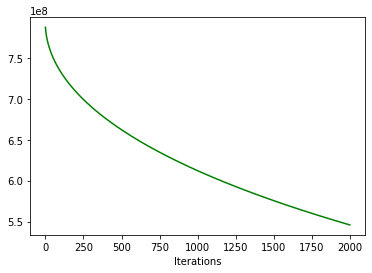

In [810]:
adagrad.Plot(loss_history3)

In [633]:
class Adadelta:

  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None

  

  def add_ones(self,X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss = float((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
            
  def fitadadelta(self, X, y, decay_factor = 0.9, eps=0.0000001):
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)        
      
    # Init Running Averages
    num_param = len(self.theta)
    E_g = [0 for _ in range(num_param)]
    E_p = [0 for _ in range(num_param)]
    delta_p = [0 for _ in range(num_param)]
    
    
    for i in range(self.epoch):
      
      for idx, gradient in enumerate((X.T @ (X @ self.theta - y))):
        # Get the running average for the gradient
        E_g[idx] = decay_factor*E_g[idx] + (1 - decay_factor)*(gradient**2)
        
        # Get the running average for the parameters
        E_p[idx] = decay_factor*E_p[idx] + ((1 - decay_factor)*(delta_p[idx]**2))
        
        # Calculate the gradient difference
        delta_p[idx] = - np.sqrt(E_p[idx] + eps) / np.sqrt(E_g[idx] + eps) * gradient
        
        # update the model weight
        self.theta[idx] = self.theta[idx] + delta_p[idx]

        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history

  def predict(self, X):
    X = self.add_ones(X.values)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel

In [634]:
adadelta = Adadelta(2e-4, 2000)

In [635]:
_,loss_history4 = adadelta.fitadadelta(X_train,Y_train)

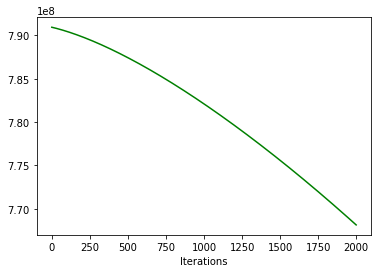

In [636]:
adadelta.Plot(loss_history4)

In [786]:
class Momentum:
  def __init__(self, lr, epoch):
    self.lr = lr
    self.epoch = epoch

    self.theta = None

  

  def add_ones(self,X):
    #self.X = X
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new

  def compute_cost(self, X, y):
    loss =((np.sum((X.dot(self.theta) - y) ** 2) ))/ 2
    return loss

    
            
  def fitmomentun(self, X, y, decay_factor = 0.9):
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    self.cost_history = np.zeros(self.epoch)       

    # Create the gradient that we keep track as an array of 0 of the same size as the number of weights
    gradients = [0 for _ in range(len(self.theta))]
    
    for i in range(self.epoch):

        # Calculate the new gradients
        gradients = [(decay_factor * g) + (self.lr * derivative) for g, derivative in zip(gradients, (X.T @ (X @ self.theta - y)))]
        
        # Updating the model parameters
        self.theta = [theta - g for theta, g in zip(self.theta, gradients)]

        self.cost_history[i] = self.compute_cost(X, y)

    return self.theta, self.cost_history

  def predict(self, X):
    X = self.add_ones(X.values)
    ypred = np.dot(X,self.theta)
    return ypred
    

  def mse(self, y,yPred):
    mse =  np.sum((yPred - y) ** 2 ) / 2
    return mse

  def Plot(self,loss_history):
    plt.figure()
    plt.plot(np.arange(self.epoch), loss_history, c='green')
    plt.xlabel('Iterations')
    plt.ylabel



  def accuracy(self,ytrue,ypred):
    acc = np.sum(np.equal(ytrue,ypred)) / len(ytrue)
    return acc






In [787]:
moment = Momentum(2e-4,2000)

In [788]:
_,loss_history5 = moment.fitmomentun(X_train, Y_train)

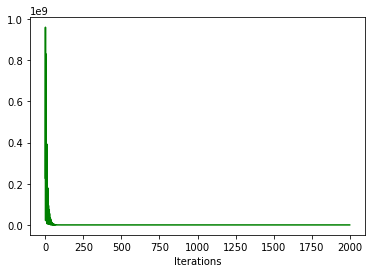

In [789]:
moment.Plot(loss_history5)

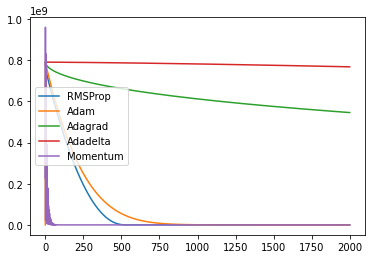

In [777]:
epochs = np.arange(2000)
plt.plot(epochs, loss_history1, label = "RMSProp")
plt.plot(epochs, loss_history2, label = "Adam")
plt.plot(epochs, loss_history3, label = "Adagrad")
plt.plot(epochs, loss_history4, label = "Adadelta")
plt.plot(epochs, loss_history5, label = "Momentum")
plt.legend()
plt.show()